# PRCP-1004-Fifa20
### PTID-CDS-DEC-23-1722

## **Data Information:**
- FIFA 20 Football is arguably the most popular sport in the world and FIFA is the most popular football (soccer) simulation game by Electronic Arts (EA Sports).

## **Aim of the Project**:
- The Information that's been provided includes the players data for the Career Mode from FIFA 15 to FIFA 20. The data allows multiple comparisons of the same players across the last 6 versions of the videogame. The aim of the project is to cluster the football players based on their whole skillset.


# Importing Libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#models
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.decomposition import PCA

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

#Force pandas to display all columns and rows
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

from PIL import Image
from IPython.display import display

In [2]:
rd=pd.read_csv('players_20.csv')
rd.info(verbose=True, show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 104 columns):
 #    Column                      Non-Null Count  Dtype  
---   ------                      --------------  -----  
 0    sofifa_id                   18278 non-null  int64  
 1    player_url                  18278 non-null  object 
 2    short_name                  18278 non-null  object 
 3    long_name                   18278 non-null  object 
 4    age                         18278 non-null  int64  
 5    dob                         18278 non-null  object 
 6    height_cm                   18278 non-null  int64  
 7    weight_kg                   18278 non-null  int64  
 8    nationality                 18278 non-null  object 
 9    club                        18278 non-null  object 
 10   overall                     18278 non-null  int64  
 11   potential                   18278 non-null  int64  
 12   value_eur                   18278 non-null  int64  
 13   wage_eur      

In [3]:
rd.columns.values

array(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'mo

# Domain Analysis

**01) Name--**
* Name of the player.

**02) Age--**
* Age of the player.

**03) Height--**
* Height of the player in inches (transformed to centimeters in preprocessing).

**04) Overall--**
* General performance quality and value of the player representing the key positional skills and international reputation rated between 1-99. Overall attribute is used only in preprocessing and discussion stages because using it in modelling could lead to domination by this feature. The aim of the project is not basically sort and categorize the players using their overall talent and international reputation, but to cluster them based on using their whole skillset.

**05) Potential--**
* Maximum Overall rating expected to be reached by a player in the top of his career rated between 1-99.

**06) PreferredFoot--**
* Right or Left. Label encoder is applied as 0 for left and 1 for right.

**07) WeakFoot--**
* Represents how well a player uses his weak foot (e.g. left for righties) rated between 1 to 5.

**08) WorkRate--**
* Degree of the effort the player puts in terms of attack and defense rated as low, medium and high. This feature is divided into two new features as AttackWorkRate and DefenseWorkRate. Besides, label encoder is applied as 0 for low, 0.5 for medium and 1 for high.

**09) Position--**
* Position of the players on the pitch which determines their roles and responsibilities in the team. Forward positions in the football and FIFA 19 can be grouped as striker (ST: center striker, RS: right striker, LS: left striker), forward (CF: center forward, RF: right forward, LF: left forward) and winger (RW: right winger, LW: left winger). The word, forward, is used both as a general term and a special position. Strikers are positioned in front of forwards and wingers and very closed to the opposing goal. Their main responsibilities are attacking and scoring goals, that’s why their ball control, shooting and finishing skills are expected to be well. Center forwards are positioned right behind the strikers. They are expected to receive balls from the others and score assists to the others or goals. In addition to the skills expected from strikers, they have to be good at passing. Right forwards and left forwards are positioned at the right and left of the center forwards with the same expectations. Wingers are positioned near the touchlines to create chances for strikers and forwards from the right and left side of the field by breakthrough and crosses and to score goals. They are expected to be good at dribbling, acceleration, passing and crossing. Positions are used only in preprocessing and discussion stages.

**10) ST--**
* Positional skill. Player’s general ability when playing in ST position rated between 1-99.

**11) RS--**
* Positional skill. Player’s general ability when playing in in RS position rated between 1-99.

**12) LS--**
* Positional skill. Player’s general ability when playing in in LS position rated between 1-99.

**13) CF--**
* Positional skill. Player’s general ability when playing in in CF position rated between 1-99.

**14) RF--**
* Positional skill. Player’s general ability when playing in in RF position rated between 1-99.

**15) LF--**
* Positional skill. Player’s general ability when playing in in LF position rated between 1-99.

**16) RW--**
* Positional skill. Player’s general ability when playing in in RW position rated between 1-99.

**17) LW--**
* Positional skill. Player’s general ability when playing in in LW position rated between 1-99.

**18) Crossing--**
* Crossing skill of the player rated between 1-99. Cross is a long-range pass from wings to center.

**19) Finishing--**
* Finishing skill of the player rated between 1-99. Finishing in football refers to finish an attack by scoring a goal.

**20) HeadingAccuracy--**
* Player’s accuracy to pass or shoot by using his head rated between 1-99.

**21) ShortPassing--**
* Player’s accuracy for short passes rated between 1-99.

**22) LongPassing--**
* Player’s accuracy for long passes rated between 1-99.

**23) Dribbling--**
* Dribbling skill of the player rated between 1-99. Dribbling is carrying the ball without losing while moving in one particular direction.

**24) SprintSpeed--**
* Speed rate of the player rated between 1-99.

**25) Acceleration--**
* Shows how fast a player can reach his maximum sprint speed rated between 1-99.

**26) FKAccuracy--**
* Player’s accuracy to score free kick goals rated between 1-99.

**27) BallControl--**
* Player’s ability to control the ball rated between 1-99.

**28) Balance--**
* Player’s ability to remain steady while running, carrying and controlling the ball rated between 1-99.

**29) ShotPower--**
* Player’s strength level of shooting the ball rated between 1-99.

**30) Jumping--**
* Player’s jumping skill rated between 1-99.

**31) Penalties--**
* Player’s accuracy to score goals from penalty rated between 1-99.

**32) Strength--**
* Physical strength of the player rated between 1-99.

**33) Agility--**
* Gracefulness and quickness of the player while controlling the ball rated between 1-99.

**34) Reactions--**
* Acting speed of the player to what happens in his environment rated between 1-99.

**35) Aggression--**
* Aggression level of the player while pushing, pulling and tackling rated between 1-99.

**36) Positioning--**
* Player’s ability to place himself in the right position to receive the ball or score goals rated between 1-99.

**37) Vision--**
* Player’s mental awareness about the other players in the team for passing rated between 1-99.

**38) Volleys--**
* Player’s ability to perform volleys rated between 1-99.

**39) LongShots--**
* Player’s accuracy of shoots from long distances rated between 1-99.

**40) Stamina--**
* Player’s ability to sustain his stamina level during the match rated between 1-99. Players with lower stamina get tired fast.

**41) Composure--**
* Player’s ability to control his calmness and frustration during the match rated between 1-99.

**42) Curve--**
* Player’s ability to curve the ball while passing or shooting rated between 1-99.

**44) Interceptions--**
* Player’s ability to intercept the ball while opposite team’s players are passing rated between 1-99. It is a defensive skill.

**45) StandingTackle--**
* Player’s ability to perform tackle (take the ball from the opposite player) while standing rated between 1-99. It is a defensive skill.

**46) SlidingTackle--**
* Player’s ability to perform tackle by sliding rated between 1-99. It is a defensive skill.

**47) Marking--**
* Player’s ability to apply strategies to prevent opposing team from taking the ball rated between 1-99. It is a defensive skill.

![Position](positions.jpg) 
An illustration of all the positions. 


# Basic checks

In [4]:
# Check no. of rows and columns
rd.shape

(18278, 104)

In [5]:
# Print first 5 rows
rd.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [6]:
# Print last 5 rows
rd.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,2018-07-13,2019.0,NaN,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,SUB,31.0,NaN,2019-02-01,2022.0,NaN,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,1,2,2,Low/Medium,Lean,No,70000.0,NaN,SUB,38.0,NaN,2019-01-01,2019.0,NaN,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,70000.0,NaN,SUB,33.0,NaN,2019-02-01,2022.0,NaN,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,48,51,40000,2000,CM,Right,1,3,2,Medium/Medium,Normal,No,NaN,NaN,SUB,37.0,Tianjin TEDA FC,NaN,2019.0,NaN,NaN,60.0,32.0,51.0,45.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,30,48,58,25,40,34,35,52,46,54,64,52,49,71,41,64,40,61,30,54,47,29,52,38,42,52,42,48,8,12,14,9,10,42+2,42+2,42+2,44+2,43+2,43+2,43+2,44+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [7]:
# Statistical data
rd.describe(include=[np.number])

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

In [8]:
# Checking for null values
rd.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [9]:
# Getting the columns which have null values
rd.columns[rd.isnull().any()].tolist()

['release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb']

In [10]:
# Check for duplicate rows
rd.duplicated().sum()

0

In [11]:
# Checking the nationality of the players(Top 10)
rd['nationality'].value_counts()[0:10]

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: count, dtype: int64

In [12]:
# Getting the players and their wages.
player_salary = rd[['short_name','wage_eur']].sort_values(by=['wage_eur'],ascending = False).head(10)
player_salary

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000
19,L. Suárez,355000
8,L. Modrić,340000
36,T. Kroos,330000
17,S. Agüero,300000
21,Sergio Busquets,300000


In [13]:
# Players and their age.
player_age = rd[['short_name','age']].sort_values(by=['age'],ascending = False)
player_age

,short_name,age
13003,H. Sulaimani,42
11832,C. Muñoz,42
200,G. Buffon,41
3706,C. Lucchetti,41
10665,F. Kippe,41
...,...,...
17782,S. Anderson,16
17614,D. Obbekjær,16
12160,S. Esposito,16
6630,Fábio Silva,16


# Exploratory Data Analysis

## Univariate Analysis

In [14]:
import sweetviz as sv
my_report=sv.analyze(rd)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights
* Most of the players are between the age of 20-30.
* Most players' heights are in the range of 175-190 cms.
* most Players are around 70-85 kgs.
* **England** has the most number of players followed by **Germany** and **Spain**.
* Most players have overall ability around 65-75.
* Most players have potential around 65-75.
* most players have at least 2 skill moves.
* More than 40% of players are substitutes.
* Around 9% players joined in 2019 followed by 7% in 2018 and 4% in 2017.

<Figure size 1000x500 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 0, 'Nationality')

Text(0, 0.5, 'No. of players')

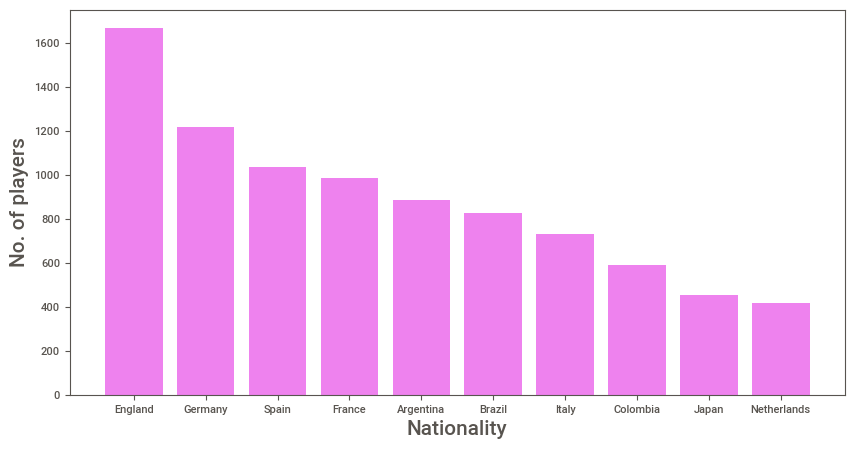

In [15]:
# Using bar plot to show the top 10 countries where most of the playes come from.
plt.figure(figsize=(10,5))
plt.bar(list(rd['nationality'].value_counts()[0:10].keys()),list(rd['nationality'].value_counts()[0:10]),color='violet')
plt.xlabel('Nationality',fontsize=15)
plt.ylabel('No. of players',fontsize=15)
plt.show()

<Axes: xlabel='preferred_foot', ylabel='count'>

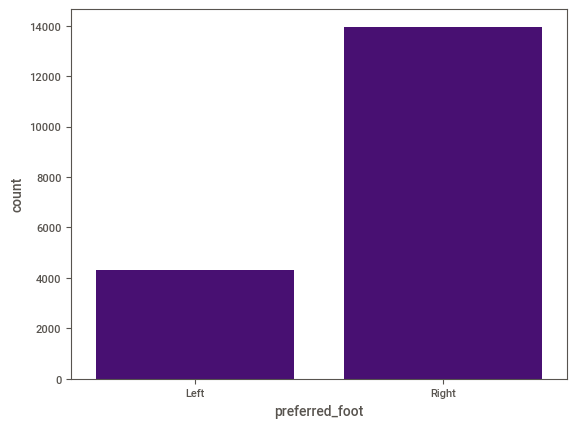

In [20]:
sns.countplot(x="preferred_foot",data=rd,color='indigo')

* The graph above shows the distribution of players by their preferred foot i.e., left or right foot.

### Work Rate of the players

<Figure size 1000x700 with 0 Axes>

[Text(0, 0, 'Medium/Low'),
 Text(1, 0, 'High/Low'),
 Text(2, 0, 'High/Medium'),
 Text(3, 0, 'Medium/Medium'),
 Text(4, 0, 'High/High'),
 Text(5, 0, 'Medium/High'),
 Text(6, 0, 'Low/High'),
 Text(7, 0, 'Low/Medium'),
 Text(8, 0, 'Low/Low')]

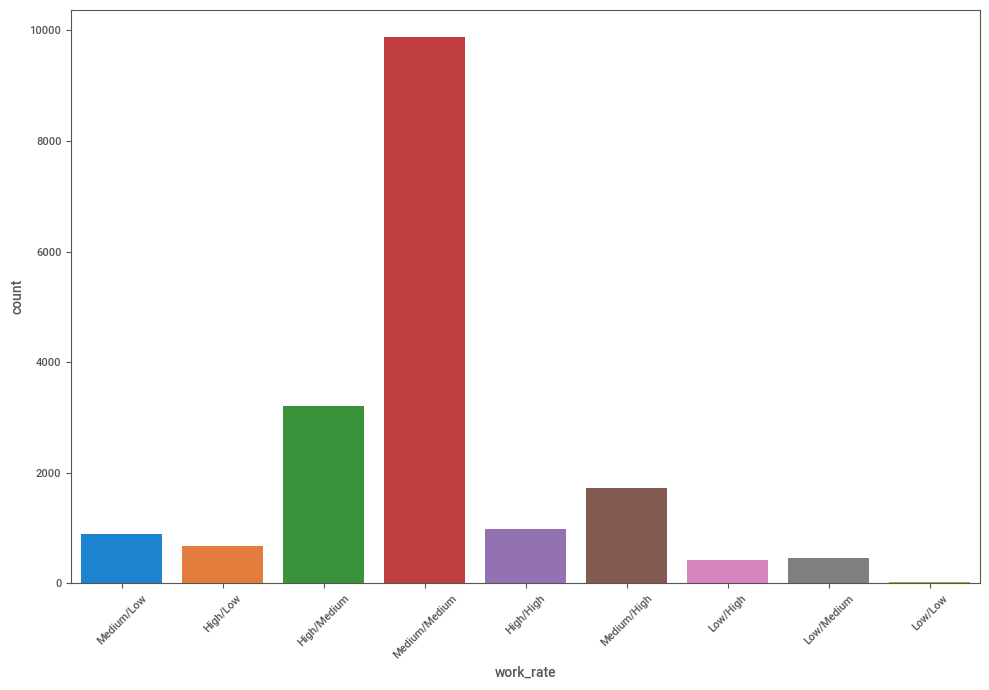

In [21]:
plt.figure(figsize=(10,7))
chart=sns.countplot(x=rd['work_rate'],data=rd)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.tight_layout()

### **INSIGHTS**--
- Most of the players are medium in both offense and defense.


## Bivariate Analysis

### Skills vs Age

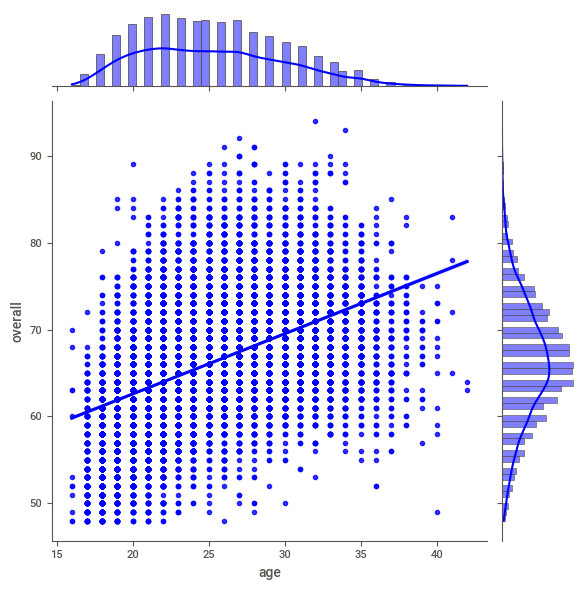

In [23]:
sns.jointplot(y='overall',x='age',data=rd,kind='reg',color='Blue')
plt.show()

* The graph above clearly depicts that as the players reach the age of 40 their overall ability decreases drastically.
* Players around the age of 22-23 are in their prime with overall ability exceeding 80.

#### Player Wages

<Figure size 1600x600 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 0, 'Player Name')

Text(0, 0.5, 'Wage in Euros')

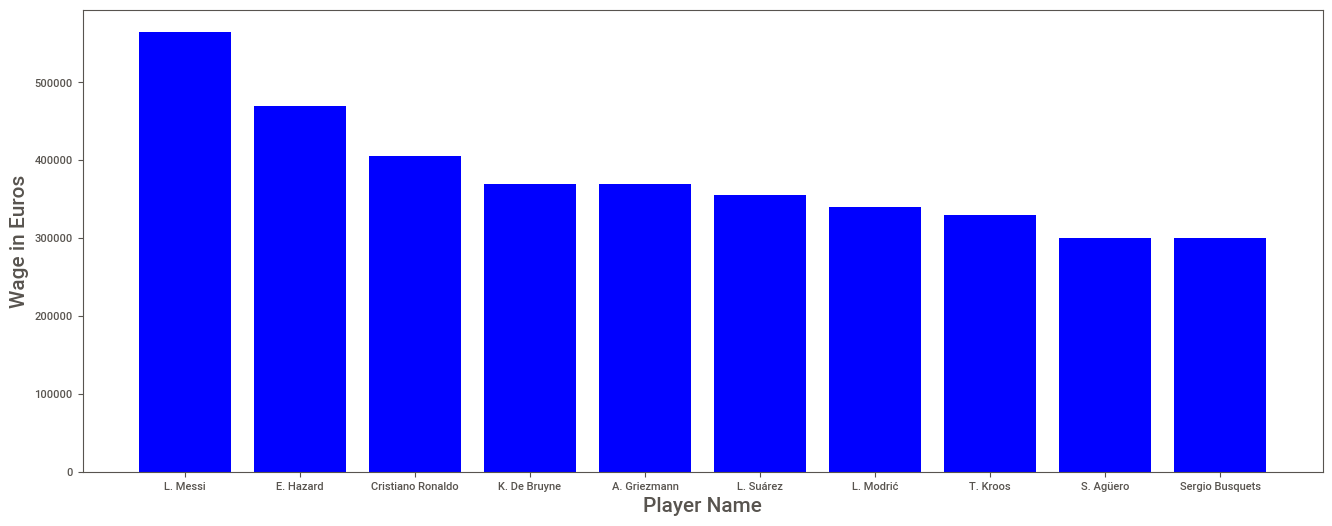

In [24]:
plt.figure(figsize=(16,6))
plt.bar(list(player_salary['short_name'])[0:11],list(player_salary['wage_eur'])[0:11], color='b')
plt.xlabel('Player Name', fontsize=15)
plt.ylabel('Wage in Euros', fontsize=15)
plt.show()

* The graph above displays the name of the top 10 players by means of their wage in euros.

#### Wage by position

<Figure size 1200x700 with 0 Axes>

[Text(0, 0, 'RW'),
 Text(1, 0, 'LW'),
 Text(2, 0, 'CAM'),
 Text(3, 0, 'GK'),
 Text(4, 0, 'RCM'),
 Text(5, 0, 'LCB'),
 Text(6, 0, 'ST'),
 Text(7, 0, 'CDM'),
 Text(8, 0, 'LDM'),
 Text(9, 0, 'RM'),
 Text(10, 0, 'RCB'),
 Text(11, 0, 'LCM'),
 Text(12, 0, 'LM'),
 Text(13, 0, 'CF'),
 Text(14, 0, 'SUB'),
 Text(15, 0, 'LB'),
 Text(16, 0, 'LS'),
 Text(17, 0, 'RB'),
 Text(18, 0, 'RDM'),
 Text(19, 0, 'RES'),
 Text(20, 0, 'RAM'),
 Text(21, 0, 'RS'),
 Text(22, 0, 'RF'),
 Text(23, 0, 'CM'),
 Text(24, 0, 'CB'),
 Text(25, 0, 'LF'),
 Text(26, 0, 'LAM'),
 Text(27, 0, 'RWB'),
 Text(28, 0, 'LWB')]

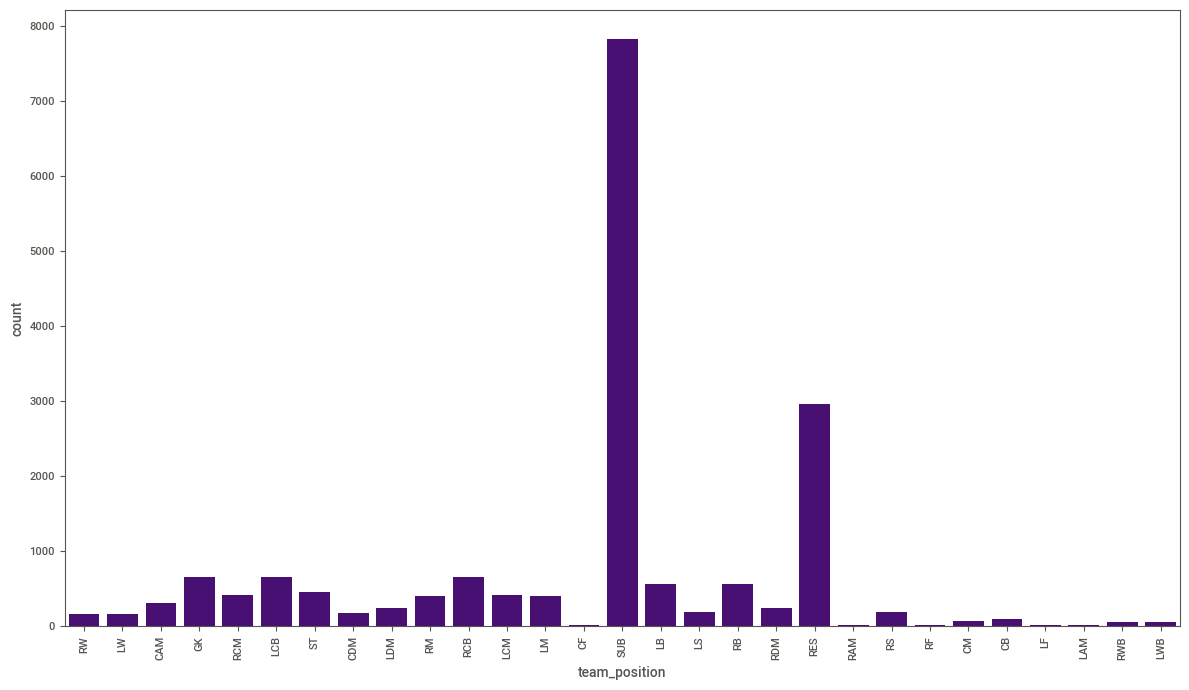

In [25]:
plt.figure(figsize=(12,7))
chart=sns.countplot(x=rd['team_position'],color='indigo')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.tight_layout()

<Axes: xlabel='wage_eur', ylabel='overall'>

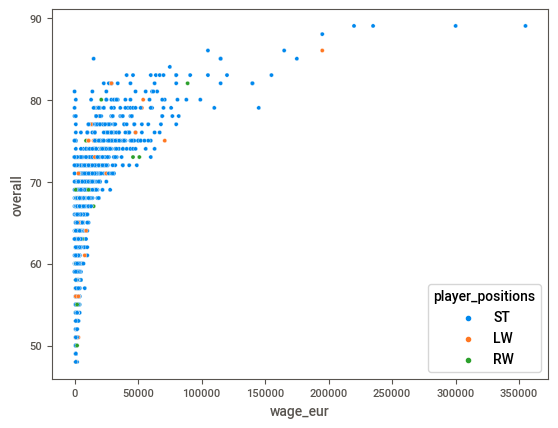

In [26]:
# Offensive Player that tends to get paid the most(ST,LW,RW)
sns.scatterplot(x='wage_eur',y='overall',hue='player_positions',data=rd.loc[rd['player_positions'].isin(['ST', 'RW', 'LW'])])

In [27]:
#Max and mean salaries for strikers
rd.loc[rd['player_positions'].isin(['ST'])].wage_eur.max()
rd.loc[rd['player_positions'].isin(['ST'])].wage_eur.mean()

#Max and mean salaries for RW
rd.loc[rd['player_positions'].isin([ 'RW'])].wage_eur.max()
rd.loc[rd['player_positions'].isin([ 'RW'])].wage_eur.mean()

#Max and mean salaries for LW
rd.loc[rd['player_positions'].isin(['LW'])].wage_eur.max()
rd.loc[rd['player_positions'].isin([ 'LW'])].wage_eur.mean()


355000

10256.495301271421

89000

6208.791208791209

195000

9681.818181818182

 Strikers earn the most among the offensive players, followed by the left wing then the right wing.

#### Nationality of players

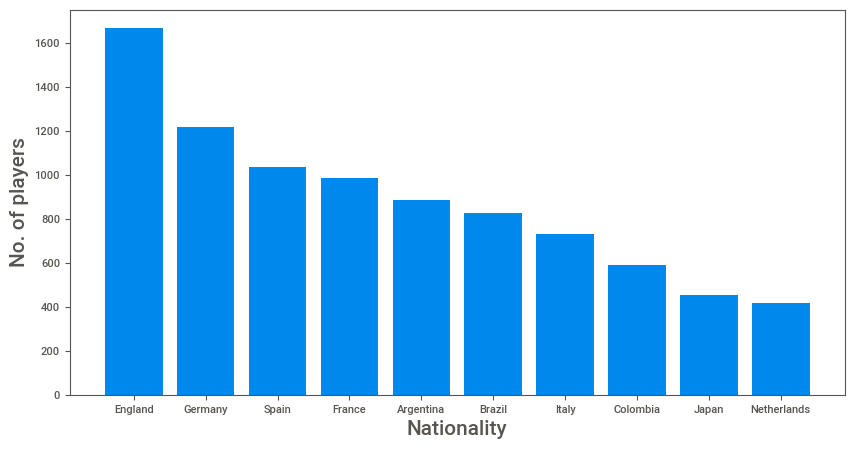

In [28]:
# Top 10 countries where most of the playes come from.

plt.figure(figsize=(10,5))
plt.bar(list(rd['nationality'].value_counts()[0:10].keys()),list(rd['nationality'].value_counts()[0:10]))
plt.xlabel('Nationality',fontsize=15)
plt.ylabel('No. of players',fontsize=15)
plt.show();

## Data preprocessing

We will choose all the skills as attributes. 

We are not including terms like long name, url, jersey number, etc. that are not skills. 

In [29]:
choose=[ 'age', 
       'height_cm', 'weight_kg',
       'potential', 'value_eur', 'wage_eur',
       'preferred_foot', 'weak_foot',
       'skill_moves', 'work_rate', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st',
       'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm',
       'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb']

In [30]:
rd=rd[choose]
#rd=rd.fillna(value=0);
rd.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 82 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18278 non-null  int64  
 1   height_cm                   18278 non-null  int64  
 2   weight_kg                   18278 non-null  int64  
 3   potential                   18278 non-null  int64  
 4   value_eur                   18278 non-null  int64  
 5   wage_eur                    18278 non-null  int64  
 6   preferred_foot              18278 non-null  object 
 7   weak_foot                   18278 non-null  int64  
 8   skill_moves                 18278 non-null  int64  
 9   work_rate                   18278 non-null  object 
 10  gk_diving                   2036 non-null   float64
 11  gk_handling                 2036 non-null   float64
 12  gk_kicking                  2036 non-null   float64
 13  gk_reflexes                 203

In [31]:
#We have some skills which are in the form on objects like lw: 88+2, we will convert them into 90.
pskills=['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm',
       'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb']
for col in pskills:
    rd[col]=rd[col].apply(lambda x:int(x.split('+')[0])+int(x.split('+')[1]) if not x else None)

#We have work rate as Low/Low which we will separate into Attack work rate and Defense work rate    
rd['Awork_rate']=rd['work_rate'].apply(lambda x:x.split('/')[0])
rd['Dwork_rate']=rd['work_rate'].apply(lambda x:x.split('/')[1])

rd.drop(columns='work_rate',inplace=True)

### Imputing null values

In [32]:
rd=rd.fillna(value=0)


### Encoding

In [33]:
lc=LabelEncoder()
#rd.select_dtypes('object').columns
lbe=[ 'preferred_foot', 'Awork_rate', 'Dwork_rate']
for col in lbe:
    rd[col]=lc.fit_transform(rd[col])

### Scaling

In [34]:
colnm=rd.columns
sc=MinMaxScaler()
rd=pd.DataFrame(sc.fit_transform(rd),columns=colnm)

In [35]:
rd.head()

,age,height_cm,weight_kg,potential,value_eur,wage_eur,preferred_foot,weak_foot,skill_moves,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Awork_rate,Dwork_rate
0,0.615385,0.285714,0.366667,0.978261,0.905213,1.000000,0.0,0.75,0.75,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.056180,0.109890,0.152174,0.144444,0.076923,0.906250,0.989247,1.000000,1.000000,0.433333,0.733333,0.943182,1.000000,0.738636,1.000000,0.977011,1.000000,0.988636,1.000000,1.000000,1.000000,0.929412,0.858824,0.964706,0.986667,0.976471,0.888889,0.644737,0.741176,0.623377,1.000000,0.453488,0.415730,0.989247,1.000000,0.800000,1.000000,0.344086,0.367816,0.264368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5
1,0.692308,0.632653,0.550000,0.956522,0.554502,0.716814,1.0,0.75,1.00,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.067416,0.109890,0.152174,0.144444,0.109890,0.937500,1.000000,0.891304,0.927083,0.388889,0.866667,0.897727,0.989247,0.954545,0.894118,0.965517,0.913978,0.852273,0.800000,0.821429,0.956044,0.905882,0.941176,0.894118,1.000000,0.694118,1.000000,1.000000,0.858824,0.753247,0.988889,0.627907,0.292135,1.000000,0.858824,0.917647,0.988095,0.290323,0.310345,0.241379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
2,0.423077,0.387755,0.300000,0.934783,1.000000,0.513274,1.0,1.00,1.00,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.089888,0.087912,0.152174,0.155556,0.109890,0.947917,0.913978,0.945652,0.989583,0.355556,0.644444,0.931818,0.913978,0.647727,0.941176,0.965517,0.989247,0.931818,0.922222,0.869048,0.989011,0.964706,0.917647,1.000000,0.946667,0.847059,0.814815,0.552632,0.811765,0.376623,0.888889,0.488372,0.370787,0.913978,0.952941,0.976471,0.976190,0.279570,0.241379,0.298851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.384615,0.653061,0.616667,0.956522,0.734597,0.221239,1.0,0.50,0.00,0.966667,1.0,0.83871,0.967391,0.8,0.989011,0.966292,1.000000,0.836957,0.988889,0.967033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.096774,0.113636,0.423529,0.114943,0.086022,0.079545,0.111111,0.380952,0.274725,0.364706,0.576471,0.658824,0.893333,0.435294,0.555556,0.776316,0.341176,0.753247,0.088889,0.290698,0.179775,0.096774,0.658824,0.047059,0.666667,0.279570,0.080460,0.172414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.461538,0.387755,0.400000,0.913043,0.853081,0.831858,1.0,0.75,0.75,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.112360,0.120879,0.054348,0.077778,0.076923,0.947917,0.892473,0.934783,0.979167,0.388889,0.733333,0.863636,0.881720,0.636364,0.964706,0.919540,0.978495,0.875000,0.833333,0.892857,0.978022,0.964706,0.905882,0.988235,0.920000,0.964706,0.839506,0.486842,0.847059,0.558442,0.844444,0.523256,0.426966,0.913978,0.941176,0.952941,0.940476,0.354839,0.252874,0.218391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Principal component analysis

In [36]:

pca = PCA(n_components=0.95)  # Keeping 95% of the variance
p_c = pca.fit_transform(rd)

pca_df = pd.DataFrame(data=p_c, columns=['PC' + str(i) for i in range(1, pca.n_components_ + 1)])

og_shape = rd.shape
t_shape = pca_df.shape

(og_shape, t_shape)

((18278, 83), (18278, 15))

In [37]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-1.606024,1.060457,0.522591,0.143863,1.424329,0.084029,-0.129758,-0.250736,-0.253997,0.108311,-0.112267,0.355128,0.140604,0.009038,-0.065425
1,-1.603386,1.264659,-0.699641,0.424781,0.707511,-0.184945,0.351148,-0.526365,-0.221121,0.069508,-0.097715,0.322960,0.320003,-0.066135,0.022564
2,-1.521480,1.572926,-0.361189,0.144976,0.466992,-0.540305,-0.216649,-0.123094,-0.389539,0.307652,-0.015718,0.358330,0.248796,0.039875,0.120052
3,3.154691,0.369717,-0.354829,0.581058,0.893779,-0.641764,-0.337216,-0.730924,-0.407094,0.054063,-0.110300,0.178403,-0.098591,-0.071181,-0.037490
4,-1.484586,1.411432,-0.370128,0.161978,0.393883,-0.524145,-0.117364,-0.184107,-0.327561,0.064478,0.022808,0.347718,0.068916,0.042507,0.036160


# Model Building

### Determining optimal number of clusters

In [38]:
X=pca_df
wcss=[]
scoren=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,random_state=42);
    kmeans.fit(X);
    wcss.append(kmeans.inertia_)
    label=kmeans.labels_
    scoren.append(silhouette_score(X,label))

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

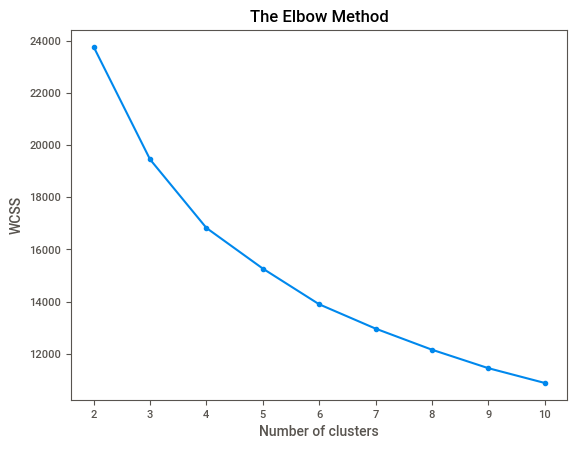

In [39]:

plt.plot(range(2,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


[0.5717900877133922,
 0.23968105067407455,
 0.2440917941468529,
 0.24570836005827978,
 0.2517801745834306,
 0.23533713331600573,
 0.2463864025595725,
 0.2581767571298283,
 0.2651140319867526]

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Silhouette Score')

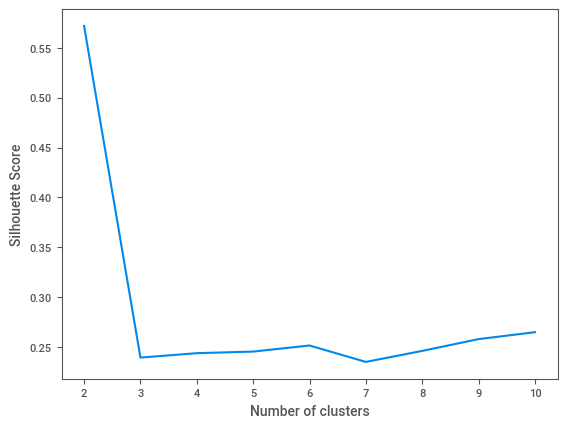

In [40]:
scoren
plt.plot(range(2,11),scoren)
#plt.title('Silhouette score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Kmeans for Optimal n

In [41]:
# Initialise the model with K as 3
X=pca_df;
model = KMeans(n_clusters=3, random_state=42)

#Training the model
model.fit(X)
labels=model.labels_

print(f'KMeans Clustering Silhouette score: {silhouette_score(X,labels):.2f}')

KMeans(n_clusters=3, random_state=42)

KMeans Clustering Silhouette score: 0.24


In [42]:
# centroids of the clusters
#no. of clusters is same as number of centroids
#since its a repeatitive process, the model has taken many` iterations to reinitialised centers
#to get clearer clusters
model.cluster_centers_

array([[-1.82810976e-01, -5.57847290e-01,  2.61304332e-02,
        -6.12813540e-02, -5.74326302e-02,  8.60812044e-03,
        -7.56238690e-03, -6.54242992e-03,  2.30514985e-03,
         3.34507524e-03, -1.28594041e-03,  6.30612979e-03,
        -3.85348460e-03, -2.97898755e-03, -2.56853693e-03],
       [ 2.97402667e+00,  1.98640933e-01, -6.65202912e-02,
         2.08756191e-01,  1.98944511e-01, -1.12543441e-01,
        -5.81951329e-02, -9.89506727e-03, -8.79438746e-03,
        -5.41801188e-03,  3.21440539e-03, -1.04754643e-02,
        -1.71444995e-03, -1.50606753e-03,  2.66245382e-03],
       [-5.28919368e-01,  4.13005418e-01, -6.28042177e-03,
         2.68277192e-03,  1.76092682e-03,  1.86266661e-02,
         1.95028418e-02,  7.63528472e-03,  1.14159387e-04,
        -1.51132223e-03,  3.22596466e-04, -2.78944163e-03,
         3.55778917e-03,  2.79165728e-03,  1.50250624e-03]])

<Axes: xlabel='PC1', ylabel='PC2'>

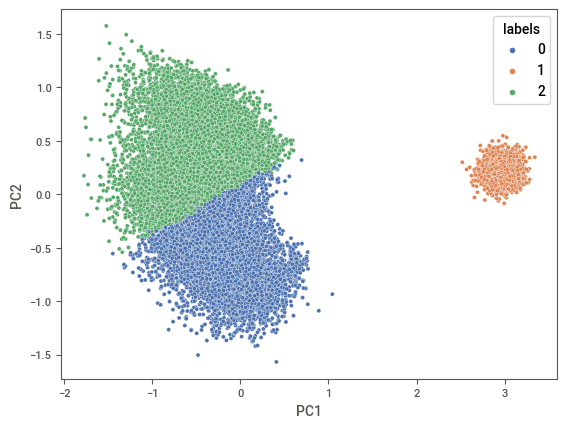

In [43]:
X['labels']= pd.DataFrame(model.labels_)
sns.scatterplot(y='PC2',x='PC1',data=X,hue='labels',palette='deep')


<Axes: xlabel='dribbling', ylabel='pace'>

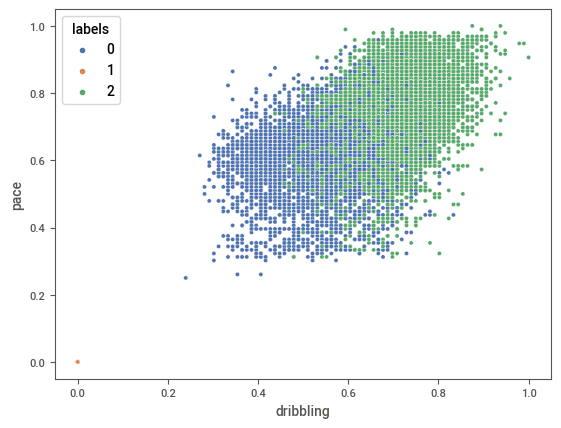

In [44]:
rd['labels']= pd.DataFrame(model.labels_)
sns.scatterplot(y='pace',x='dribbling',data=rd,hue='labels',palette='deep')

## Agglomerative Clustering

In [45]:
X=pca_df;
model =  AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

#Training the model
model.fit(X)
labels=model.labels_

print(f'Hierarchical Clustering Silhouette score: {silhouette_score(X,labels):.2f}')

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

Hierarchical Clustering Silhouette score: 0.49


<Axes: xlabel='PC2', ylabel='PC1'>

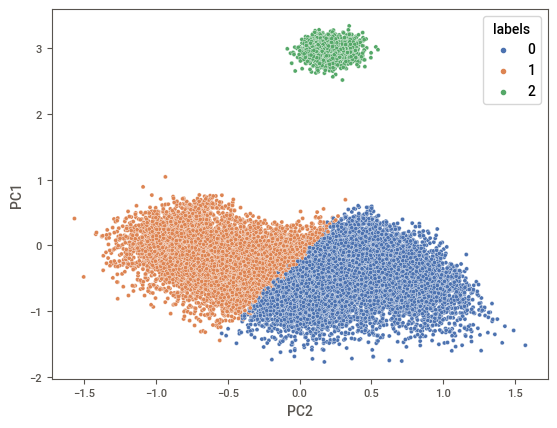

In [46]:
X['labels']= pd.DataFrame(model.labels_)
sns.scatterplot(y='PC1',x='PC2',data=X,hue='labels',palette='deep')


<Axes: xlabel='dribbling', ylabel='pace'>

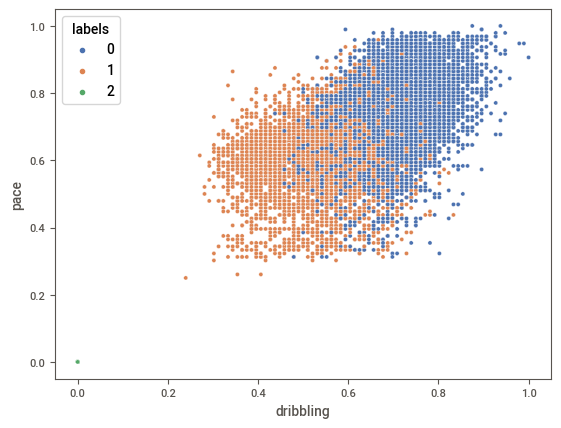

In [47]:
rd['labels']= pd.DataFrame(model.labels_)
sns.scatterplot(y='pace',x='dribbling',data=rd,hue='labels',palette='deep')

# **CONCLUSION**--
- By model comparison it is clear that K-MEANS method is the most viable with a silhouette score of **47%**.
- England has the most number of players followed by Germany and Spain.
- After the age of 22-23, improvement is slow.
- The strikers are the most well paid among the offensive players.
- More than 40% of the players hold the position of a substitute in their team.
